In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
sigma_x, sigma_y, sigma_z, sigma_0 = sp.symbols('sigma_x sigma_y sigma_z sigma_0')
t_prime, delta, m, E = sp.symbols('t^{\\prime} Delta m, E')
x = sp.symbols('x')
L = sp.symbols('L')

In [3]:
coef_c = m*sigma_z-E*sigma_0 + 2*delta*sigma_x
matrix_c = coef_c.subs({
    sigma_x: sp.Matrix([[0, 1], [1, 0]]),
    sigma_y: sp.Matrix([[0, -1j], [1j, 0]]),
    sigma_z: sp.Matrix([[1, 0], [0, -1]]),
    sigma_0: sp.Matrix([[1, 0], [0, 1]])})

coef_dc = 2j*t_prime*sigma_z - 1j*delta*sigma_y
matrix_dc = coef_dc.subs({
    sigma_x: sp.Matrix([[0, 1], [1, 0]]),
    sigma_y: sp.Matrix([[0, -1j], [1j, 0]]),
    sigma_z: sp.Matrix([[1, 0], [0, -1]]),
    sigma_0: sp.Matrix([[1, 0], [0, 1]])})

matrix = matrix_c@sp.Inverse(matrix_dc)
matrix=matrix.nsimplify()
matrix

Matrix([
[ -2*Delta**2/(Delta**2 + 4*t^{\prime}**2) - 4*I*t^{\prime}*(-E + m)/(2*Delta**2 + 8*t^{\prime}**2), 4*I*Delta*t^{\prime}/(Delta**2 + 4*t^{\prime}**2) + 2*Delta*(-E + m)/(2*Delta**2 + 8*t^{\prime}**2)],
[-8*I*Delta*t^{\prime}/(2*Delta**2 + 8*t^{\prime}**2) - Delta*(-E - m)/(Delta**2 + 4*t^{\prime}**2),    4*Delta**2/(2*Delta**2 + 8*t^{\prime}**2) + 2*I*t^{\prime}*(-E - m)/(Delta**2 + 4*t^{\prime}**2)]])

In [29]:
eig_vals = list(matrix.eigenvals().keys())
eig_vecs = matrix.eigenvects()
eig_vecs = [vec[2][0] for vec in eig_vecs]

In [33]:
eig_vecs[0]

Matrix([
[(Delta**2 + 4*t^{\prime}**2)*(-2*I*m*t^{\prime}/(Delta**2 + 4*t^{\prime}**2) - sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)/(Delta**2 + 4*t^{\prime}**2))/(Delta*E + Delta*m - 4*I*Delta*t^{\prime}) + (-2*Delta**2 + 2*I*E*t^{\prime} + 2*I*m*t^{\prime})/(Delta*E + Delta*m - 4*I*Delta*t^{\prime})],
[                                                                                                                                                                                                                                                                                                                                                           1]])

In [34]:
eig_vals[0]

-2*I*m*t^{\prime}/(Delta**2 + 4*t^{\prime}**2) - sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)/(Delta**2 + 4*t^{\prime}**2)

In [ ]:
t_r = 1/(1 + 0.1*(1-np.cos(eig_vals*L)))

In [6]:
P, D  =matrix.diagonalize()

In [8]:
sol = P@sp.exp(x*D)@sp.Inverse(P)
sol = sol.nsimplify()
sol

Matrix([
[(-2*Delta**2 + 2*I*E*t^{\prime} - sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2))*(-Delta*E - Delta*m + 4*I*Delta*t^{\prime})*exp(x*(-2*I*m*t^{\prime} - sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2))/(Delta**2 + 4*t^{\prime}**2))/(2*Delta*(E + m - 4*I*t^{\prime})*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)) + (-2*Delta**2 + 2*I*E*t^{\prime} + sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2))*(Delta*E + Delta*m - 4*I*Delta*t^{\prime})*exp(x*(-2*I*m*t^{\prime} + sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2))/(Delta**2 + 4*t^{\prime}**2))/(2*Delta*(E + m - 4*I*t^{\prime})*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)), (-2*Delta**2 + 2*I*E*t^{\prime} - sqrt(4*Del

In [9]:
k, h = sp.symbols('k h')
W = sol.subs({x:0})@sp.Inverse(sol.subs({x: L}))
W = W.nsimplify()

In [11]:
t = 2j*k*h/((1-1j*k*h)*(W[1, 0]- W[0, 1]) + W[1, 1] - W[0, 0]*(1-1j*k*h)*(1-1j*k*h))
t

2.0*I*h*k/(((-2*Delta**2 + 2*I*E*t^{\prime} + sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2))/(2*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)) + (2*Delta**2 - 2*I*E*t^{\prime} + sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2))/(2*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)))*(2*Delta**2*exp(-2*I*L*m*t^{\prime}/(Delta**2 + 4*t^{\prime}**2) - L*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)/(Delta**2 + 4*t^{\prime}**2))*exp(2*I*L*m*t^{\prime}/(Delta**2 + 4*t^{\prime}**2) - L*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\prime}**2 - 4*E**2*t^{\prime}**2)/(Delta**2 + 4*t^{\prime}**2))*exp(2*I*L*m*t^{\prime}/(Delta**2 + 4*t^{\prime}**2) + L*sqrt(4*Delta**4 - Delta**2*E**2 + Delta**2*m**2 + 16*Delta**2*t^{\p

In [12]:
t = t.subs({E: k})

In [13]:
t_np = sp.lambdify([k, h, delta, m, t_prime, L], t, modules='numpy')

In [81]:
ks = np.linspace(-2.01, 2.01, 2000) + 0.0j

args = [ks, 1.0, 1.0, .0, 0.0, 5.]

t_values = t_np(*args)

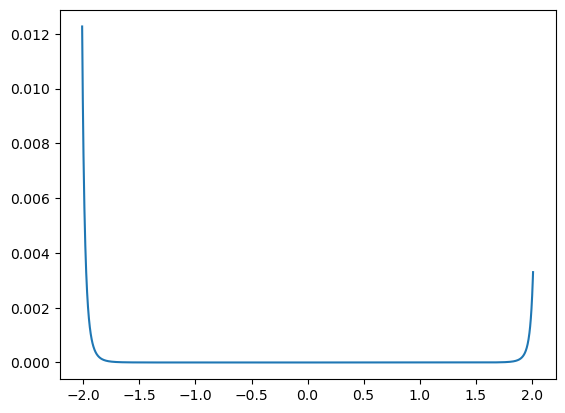

In [82]:
plt.plot(ks, np.abs(t_values)**2)
plt.show()